Testing the TreePhate class and the shortest path computation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from src.dataset import TreePhate, SwissRoll, SwissRollStretch
from src.mds import embed_MDS
import matplotlib.pyplot as plt

from omegaconf import DictConfig
from omegaconf import OmegaConf
from src.graph import get_umap_graph

/home/mila/g/guillaume.huguet/.conda/envs/metric_emb/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-22 09:59:46.578804: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-22 09:59:48.534038: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-22 09:59:48.534201: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you

In [2]:
ds = SwissRoll(n_points=1000)
X = ds.X
# labels = ds.labels
# # plot 3d data colored by labels
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X[:,0], X[:,1], X[:,2], c=labels)
# plt.show()

In [2]:
ds = SwissRollStretch(n_points=1000)
geo = ds.get_geodesic()

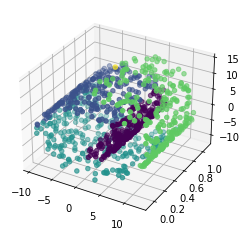

In [3]:
# plot the 3d swiss roll
X = ds.X
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=ds.labels)

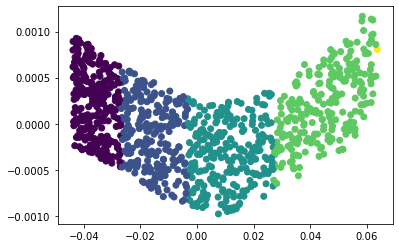

In [4]:
emb = embed_MDS(geo, 2, input_is_dist=True)
plt.scatter(emb[:,0], emb[:,1], c=ds.labels)

In [ ]:
get_umap_graph(X, knn=5)

In [14]:
labels.reshape(-1).shape

(1000,)

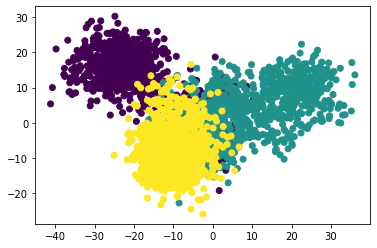

In [9]:
ds = TreePhate(n_points=1000, n_branch=3, n_dim=2)
X = ds.X
labels = ds.labels
# plot data colored by labels
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], c=labels)
plt.show()

In [10]:
labels.shape

(3000,)

In [2]:
TreePhate?

Init signature:
TreePhate(
    n_dim: int = 10,
    n_points: int = 200,
    n_branch: int = 10,
    sigma: float = 4,
    knn_geodesic: int = 10,
    random_state=42,
)
Docstring:     
Dataset from PHATE, modified for our purposes.
The geodeisc distances are computed from a manifold without noise and the Data are a noisy version.
File:           /network/scratch/g/guillaume.huguet/projects/metric_embeddings/src/dataset.py
Type:           type
Subclasses:     


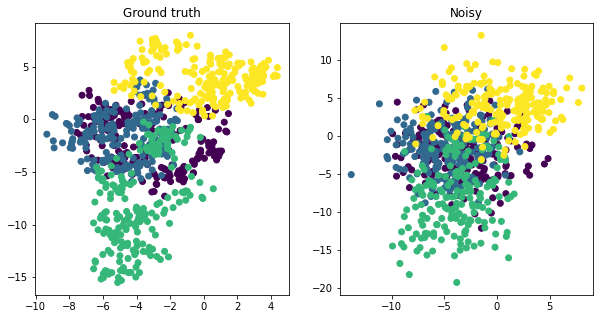

In [3]:
# plot the ground truth manifold and noisy manifold
ds = TreePhate(n_dim=2, n_branch=4,sigma=2)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(ds.gt_X[:, 0], ds.gt_X[:, 1], c=ds.labels)
ax[0].set_title("Ground truth")
ax[1].scatter(ds.X[:, 0], ds.X[:, 1], c=ds.labels)
ax[1].set_title("Noisy")
plt.show()


Text(0.5, 1.0, 'MDS embedding')

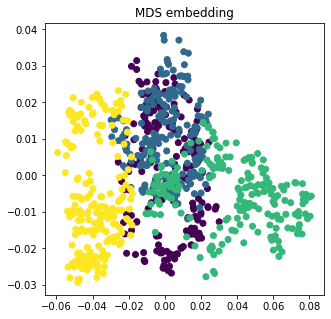

In [4]:
# MDS using the shortest path distance
geodesic_dist = ds.get_geodesic()
Y = embed_MDS(geodesic_dist, input_is_dist=True)
# Plot the MDS embedding
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(Y[:, 0], Y[:, 1], c=ds.labels)
ax.set_title("MDS embedding")

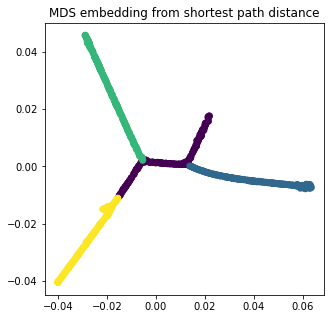

In [5]:
# Same thing but in higher dimension
ds = TreePhate(n_dim=10, n_branch=4,sigma=4)
geodesic_dist = ds.get_geodesic()
Y = embed_MDS(geodesic_dist, input_is_dist=True)
# Plot the MDS embedding
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(Y[:, 0], Y[:, 1], c=ds.labels)
ax.set_title("MDS embedding from shortest path distance")
plt.show()

In [6]:
from hydra.utils import instantiate

In [7]:
cfg = OmegaConf.load("/network/scratch/g/guillaume.huguet/projects/metric_embeddings/config/data/tree.yaml")

In [12]:
ds = instantiate(cfg.data)(random_state=452)

In [14]:
ds.get_geodesic()

array([[  0.        ,   1.85117919,   2.35295933, ..., 207.01547323,
        205.64911433, 205.47179018],
       [  1.85117919,   0.        ,   1.68455681, ..., 208.84968873,
        207.48332983, 207.30600567],
       [  2.35295933,   1.68455681,   0.        , ..., 207.47156624,
        206.10520734, 205.92788318],
       ...,
       [207.01547323, 208.84968873, 207.47156624, ...,   0.        ,
          1.88588302,   1.54368306],
       [205.64911433, 207.48332983, 206.10520734, ...,   1.88588302,
          0.        ,   1.18685343],
       [205.47179018, 207.30600567, 205.92788318, ...,   1.54368306,
          1.18685343,   0.        ]])